In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('haberman.csv')
df.shape

(305, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [12]:
df = pd.read_csv('haberman.csv', header=None, names=['Age','Operation_year','Axil_nodes','Surv_status'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age               306 non-null int64
Operation_year    306 non-null int64
Axil_nodes        306 non-null int64
Surv_status       306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [14]:
df.head(10)

,Age,Operation_year,Axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [15]:
df.describe()

,Age,Operation_year,Axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


From above information we can observe that
1. Patients vary from age 30 to 83
2. Patient's maximum axillery nodes found to be 52 and minimum nodes are 0
3. 75 percent patients found to have nodes less than 4 , 25 percent of patients have 0 lymph nodes
4. Year of operations are between year 1958 and 1969

In [16]:
df['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

It is observed that in given dataset 225 people are survived and 81 people are not survived

In [43]:
survived_info = df[df['Surv_status']==1]
axil_count = len(survived_info[survived_info['Axil_nodes'] <= 4]) / len(survived_info) * 100
axil_count

83.55555555555556

It is observed that around 83 percent of people who survived have Axil nodes less than equal to 4.

So increase in Axil nodes lead to more risk ??

In [44]:
not_survived_info = df[df['Surv_status']==2]
axil_count = len(not_survived_info[not_survived_info['Axil_nodes'] > 4]) / len(not_survived_info) * 100
axil_count

48.148148148148145

It is observed that almost half of the people who have not survived have Axil nodes greater than 4.

In [47]:
df['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

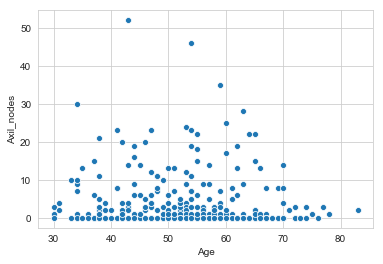

In [53]:
sns.scatterplot(x='Age',y='Axil_nodes', data=df)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


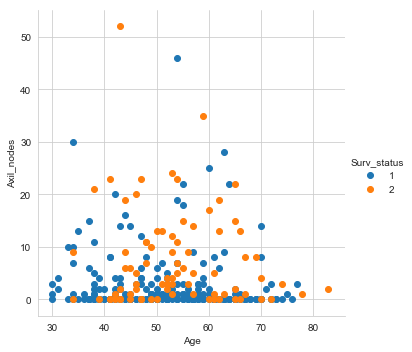

In [51]:
sns.set_style(style='whitegrid')
sns.FacetGrid(df, hue='Surv_status', size=5)\
.map(plt.scatter, 'Age','Axil_nodes')\
.add_legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


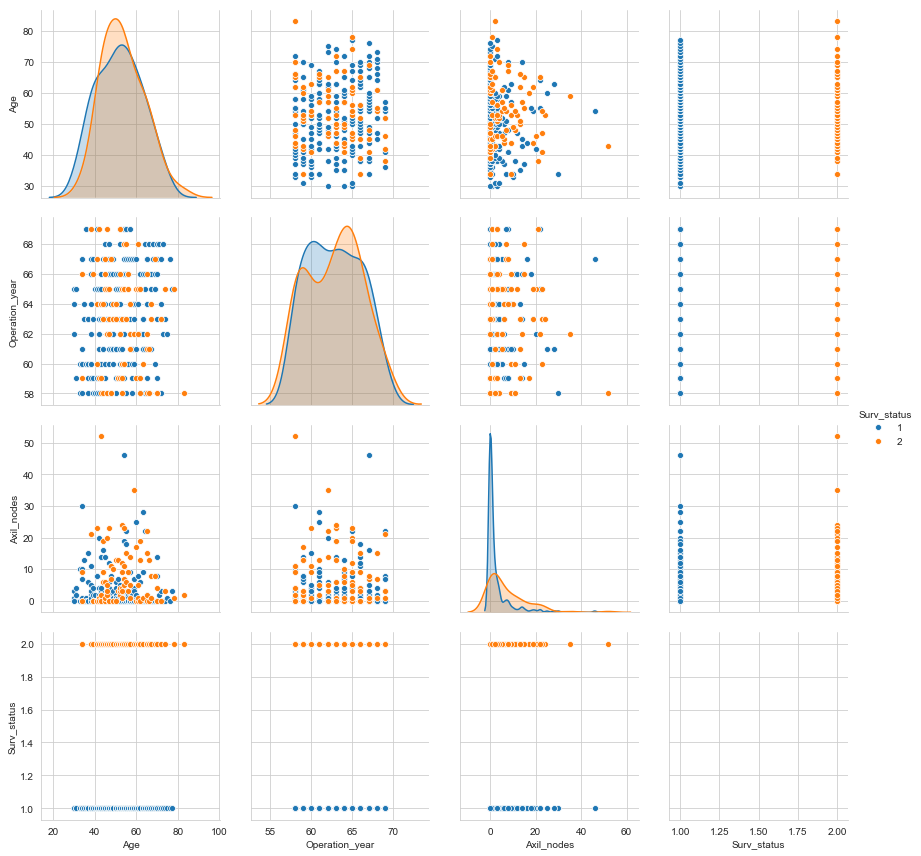

In [68]:
plt.close();
sns.set_style("whitegrid")
sns.pairplot(df, hue='Surv_status', size=3)
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


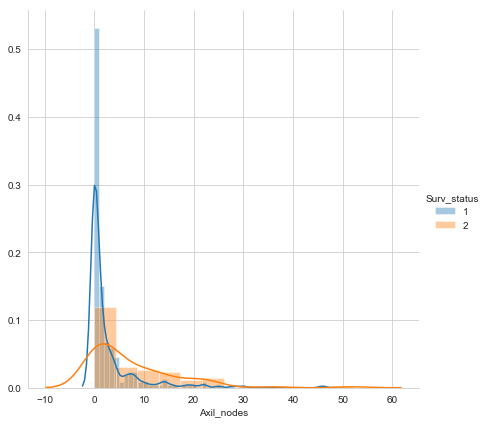

In [72]:
plt.close();
sns.FacetGrid(df, hue="Surv_status", size=6)\
.map(sns.distplot , "Axil_nodes")\
.add_legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


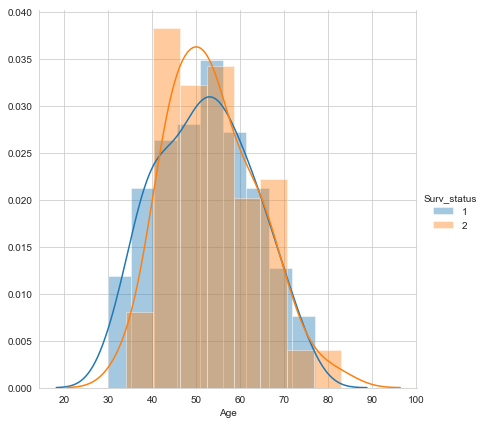

In [74]:
sns.set_style(style="whitegrid")
sns.FacetGrid(df, hue='Surv_status',size=6)\
.map(sns.distplot, 'Age')\
.add_legend()
plt.show()

[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846] [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]


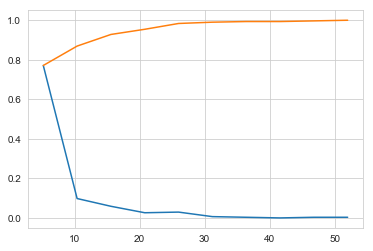

In [77]:
count, bin_edges = np.histogram(df['Axil_nodes'], bins=10, density=True)
print(count, bin_edges)

pdf = count/sum(count)
print(pdf)

cdf= np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.00986558 0.01664817 0.02836355 0.03267974 0.03391294 0.02528055
 0.02528055 0.01109878 0.00431619 0.0012332 ] [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]


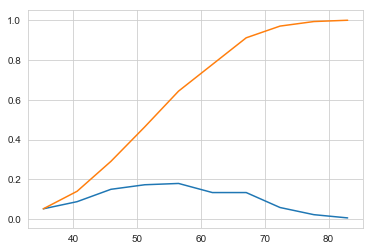

In [78]:
count, bin_edges = np.histogram(df['Age'], bins=10, density=True)
print(count, bin_edges)

pdf = count/sum(count)
print(pdf)

cdf= np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)